# Phragmites Classification: Full Image Classification

This notebook represents a beta application for the segmentation of the plant Phragmites in satelite images.
<br>

Built by Troy Saltiel and Greg Lee

Last modified: 04.15.20

In [1]:
#Libraries: 
import os
import numpy as np
import functions #Custom Library

import matplotlib.pyplot as plt
import rasterio as rio
import earthpy.plot as ep

import sklearn as sk
from sklearn.metrics import accuracy_score
import tensorflow as tf


plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20

## Load Images

In [2]:
directory = './images/'

#Copy the image paths
image_path = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    image_path.append(directory + filename)

#Sort the Files
image_path = sorted(image_path)

In [3]:
#The current network is trained to classify 32x32x5 images
#So let's take the current image and break it down into 32x32x5 sections:
im = functions.open_image(image_path[2])
im = functions.image_prep(im)
im.shape

(2130, 32, 32, 5)

## Rebuild the Model

In [4]:
# Recreate the UNet model, including its weights and the optimizer
model = tf.keras.models.load_model('v1_unet_full_model.h5')

In [5]:
#Visualizing predictions: 
pred = model.predict(im, verbose=1)

# Need binary mask: 
pred = (pred > 0.5).astype(np.uint16)

2130/2130 [==============================] - 2s 829us/sample


## Visualize the Result

In [6]:
with rio.open('train_set_labels_raster.tif', 'r+') as src:
    train_label = src.read()

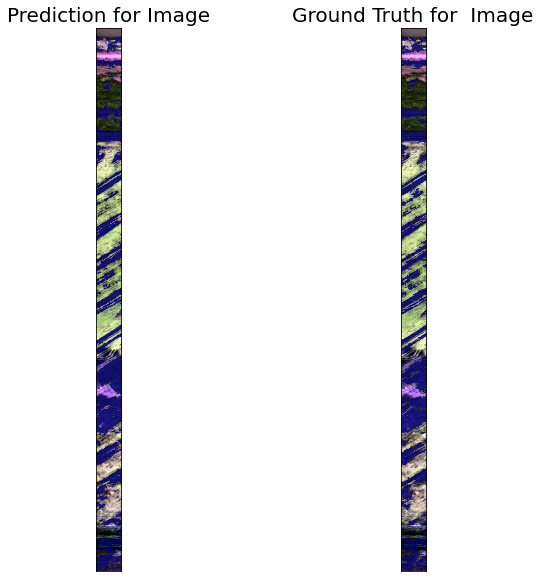

In [7]:
pred = functions.reshaper(functions.unstack(pred))
train_label = functions.reshaper(train_label)

#Crop the images to the right dimensions
x = int(train_label.shape[0])
y = int(train_label.shape[1])
pred = pred[:x,:y]

f, (ax1,ax2) = plt.subplots(1, 2)

#Plot the image
ep.plot_rgb(functions.open_image(image_path[2]),ax = ax1,stretch = True,rgb=[0,1,2])
#Plot the Mask
ax1.imshow(pred, 'jet', interpolation='none', alpha=0.7)
ax1.set_title('Prediction for Image')

#Plot the image
ep.plot_rgb(functions.open_image(image_path[2]),ax = ax2,stretch = True,rgb=[0,1,2])
#Plot the Mask
ax2.imshow(train_label, 'jet', interpolation='none', alpha=0.7)
ax2.set_title('Ground Truth for  Image')

plt.show()

In [8]:
print('Accuracy: {0}'.format(1- accuracy_score(train_label,pred)))

Accuracy: 0.8954806418371853
